# II. Keyword Analysis

TODO: Zusammenfassen ähnlicher Keywords - wie bereits in KeywordsAll geschehen

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import *

In [2]:
data = pd.read_csv('../data/preprocessed/10_02PreProUDText.csv')
data = data.drop(columns={'Unnamed: 0'})
data['Date']=pd.to_datetime(data['Date'],format='%b %d %Y')

In [3]:
data.head()

Title  \
0  propelling the transition digitization bolster...   
1  following outrage over hurricane isaias respon...   
2  propelling the transition new and better trans...   
3  pipeline infrastructure planning in the era of...   
4  propelling the transition green hydrogen could...   

                                                 URL            Author  \
0  https://www.utilitydive.com/news/propelling-th...         deep dive   
1  https://www.utilitydive.com/news/following-out...     robert walton   
2  https://www.utilitydive.com/news/propelling-th...     robert walton   
3  https://www.utilitydive.com/news/pipeline-infr...           opinion   
4  https://www.utilitydive.com/news/propelling-th...  herman k trabish   

                                          Teasertext  \
0  the continuing automation and digitization of ...   
1  the bipartisan legislation would alter rules t...   
2  new technologies can make it easier to develop...   
3  scrutiny of the siting of infrastructure proje...   
4  green hydrogen beats renewables plus batteries...   

                                            Fulltext  \
0  increasing digitization in the power sector is...   
1  a bipartisan group of connecticut lawmakers on...   
2  electric transmission lines — capable of carry...   
3  the following is a contributed article by emil...   
4  renewablesgenerated electricity and battery en...   

                       Topic      DiveBrief       Date  \
0  transmission-distribution  no dive brief 2020-08-21   
1  transmission-distribution  no dive brief 2020-08-20   
2  transmission-distribution  no dive brief 2020-08-19   
3  transmission-distribution  no dive brief 2020-08-18   
4  transmission-distribution  no dive brief 2020-08-17   

                                  FullTextWordTokens  \
0  ['increas', 'digit', 'power', 'sector', 'creat...   
1  ['bipartisan', 'group', 'connecticut', 'lawmak...   
2  ['electr', 'transmiss', 'line', '—', 'capabl',...   
3  ['follow', 'contribut', 'articl', 'emili', 'p'...   
4  ['renewablesgener', 'electr', 'batteri', 'ener...   

                                       FullTextLemma  
0  ['increasing', 'digitization', 'power', 'secto...  
1  ['bipartisan', 'group', 'connecticut', 'lawmak...  
2  ['electric', 'transmission', 'line', '—', 'cap...  
3  ['following', 'contributed', 'article', 'emily...  
4  ['renewablesgenerated', 'electricity', 'batter...

In [4]:
keyword_list = []
with open("../data/raw/keywords.txt","r") as file:
        keyword_list = list(file.readlines())       

In [5]:
# Removed ML and AI since they are not counted right
# I am only using the single keywords here, since the double keywords are much more complicated to count
keyword_list = [word.rstrip() for word in keyword_list]
keyword_list = [word.lower() for word in keyword_list]

In [6]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
keyword_list = [lemmatizer.lemmatize(word) for word in keyword_list]

In [7]:
keyword_list

['microgrid',
 'grid',
 'p2p',
 'matchmaking',
 'automation',
 'rpa',
 'robot',
 'blockchain',
 'dlt',
 'innovation',
 'trend',
 'drone',
 'satellite',
 'v2g',
 '5g',
 'decentralized',
 'autarky',
 'uhf',
 'chatbot',
 'callbot',
 'carbon',
 'clean',
 'green',
 'renewable',
 'climate',
 'coal',
 'solar',
 'wind',
 'gas',
 'covid',
 'covid-19',
 'corona',
 'digitalization',
 'digitization',
 'politics',
 'law',
 'regulation',
 'court']

In [8]:
count = pd.DataFrame()
count['FullTextLemma'] = data['FullTextLemma']
count['Title'] = data['Title']

In [9]:
for keyword in keyword_list:
    count[keyword] = count['FullTextLemma'].apply(lambda _str: _str.lower().count(keyword))

In [10]:
count

FullTextLemma  \
0     ['increasing', 'digitization', 'power', 'secto...   
1     ['bipartisan', 'group', 'connecticut', 'lawmak...   
2     ['electric', 'transmission', 'line', '—', 'cap...   
3     ['following', 'contributed', 'article', 'emily...   
4     ['renewablesgenerated', 'electricity', 'batter...   
...                                                 ...   
1385  ['two', 'shift', 'transportation', 'sector', '...   
1386  ['electric', 'grid', 'becomes', 'distributed',...   
1387  ['n', 'pp1', 'margin', '00px', '00px', '00px',...   
1388  ['ev', 'deployment', 'one', 'pillar', 'durkan'...   
1389  ['following', 'contributed', 'article', 'brad'...   

                                                  Title  microgrid  grid  p2p  \
0     propelling the transition digitization bolster...          0    19    0   
1     following outrage over hurricane isaias respon...          0     2    0   
2     propelling the transition new and better trans...          0    15    0   
3     pipeline infrastructure planning in the era of...          0     0    0   
4     propelling the transition green hydrogen could...          2     3    0   
...                                                 ...        ...   ...  ...   
1385  how new ideas of mobility will shape public ev...          0     6    0   
1386  new york utilities propose cybersecurity proto...          0     2    0   
1387  how oncor is preparing for a wave of large ele...          0     2    0   
1388  seattle mayor proposes ev readiness requiremen...          0     0    0   
1389  energy transition carbon capture is clean ener...          0     2    0   

      matchmaking  automation  rpa  robot  blockchain  ...  gas  covid  \
0               0           6    0      0           0  ...    0      0   
1               0           0    0      0           0  ...    0      0   
2               0           0    0      0           0  ...    1      0   
3               0           0    0      0           0  ...    7      0   
4               0           0    0      0           0  ...   18      0   
...           ...         ...  ...    ...         ...  ...  ...    ...   
1385            0           0    0      0           0  ...    1      0   
1386            0           0    0      0           0  ...    3      0   
1387            0           0    0      0           0  ...    2      0   
1388            0           0    0      0           0  ...    0      0   
1389            0           0    0      0           0  ...    5      0   

      covid-19  corona  digitalization  digitization  politics  law  \
0            0       0               0             7         0    0   
1            0       0               0             0         0   10   
2            0       0               0             0         0    0   
3            0       0               0             0         0    3   
4            0       0               0             0         0    0   
...        ...     ...             ...           ...       ...  ...   
1385         0       0               0             0         0    0   
1386         0       0               0             0         0    0   
1387         0       0               0             0         0    0   
1388         0       0               0             0         0    0   
1389         0       0               0             0         0    0   

      regulation  court  
0              0      0  
1              1      1  
2              0      0  
3              1      8  
4              0      0  
...          ...    ...  
1385           0      0  
1386           0      0  
1387           0      0  
1388           0      0  
1389           0      0  

[1390 rows x 40 columns]

In [11]:
count.to_csv('../data/analysis/keywords_single_count.csv')

In [12]:
def sum_columns(dataframe):
    df = pd.DataFrame()
    for column in dataframe.columns: 
        df.at[0,column] = dataframe[column].sum()
    return df

In [13]:
total = pd.DataFrame()
#for column in count.columns: 
    #total.at[0,column] = count[column].sum()
total = sum_columns(count)

In [14]:
total

FullTextLemma  \
0  ['increasing', 'digitization', 'power', 'secto...   

                                               Title  microgrid    grid  p2p  \
0  propelling the transition digitization bolster...      397.0  3009.0  0.0   

   matchmaking  automation    rpa  robot  blockchain  ...     gas  covid  \
0          0.0        63.0  152.0   10.0        23.0  ...  2143.0  480.0   

   covid-19  corona  digitalization  digitization  politics    law  \
0       0.0   196.0            23.0          22.0      29.0  829.0   

   regulation  court  
0       433.0  456.0  

[1 rows x 40 columns]

In [15]:
# Not Found Keywords
nf_df = pd.DataFrame()
nf_df = total
for colum in nf_df.columns:
    if nf_df.at[0,colum] != 0:
        nf_df = nf_df.drop(columns={colum})

In [16]:
nf_df

p2p  matchmaking  dlt  autarky  uhf  chatbot  callbot  covid-19
0  0.0          0.0  0.0      0.0  0.0      0.0      0.0       0.0

In [17]:
def drop_empty_cols(dataframe):
    for colum in dataframe.columns:
        if dataframe.at[0,colum] == 0:
            dataframe = dataframe.drop(columns={colum}) 
    return dataframe

In [18]:
def sort_keyword_frame(df):
    return df.T.sort_values(by=0, ascending=False).T

Problem: Double/Multiple Words are not counted correctly!

In [19]:
#for colum in total.columns:
 #   if total.at[0,colum] == 0:
  #      total = total.drop(columns={colum})
total = drop_empty_cols(total)

In [20]:
total=total.drop(columns={'FullTextLemma'})
total.to_csv('../data/analysis/keywords_single_total.csv')

In [21]:
# Function that takes a dataframe with keyword columns and the number of occurances in 0 and builds a Bar-Plot

def keyword_plot(df_sum, title= "Total Occurance of Keyword(s) All"):
    new_trans = pd.DataFrame(df_sum.T)
    new_trans = new_trans.rename(columns={0:"Count"})
    new_trans['Keywords'] = new_trans.index
    plt.figure(figsize=(10,5))
    chart = sns.barplot(
            data=new_trans,
            x="Keywords",
            y="Count",
            palette="Set1"
            )
    plt.xticks(
        rotation=45, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='x-large'  
    )
    plt.title(title)
    return chart

In [22]:
total

Title  microgrid    grid  \
0  propelling the transition digitization bolster...      397.0  3009.0   

   automation    rpa  robot  blockchain  innovation  trend  drone  ...  \
0        63.0  152.0   10.0        23.0       308.0  203.0   11.0  ...   

     wind     gas  covid  corona  digitalization  digitization  politics  \
0  1401.0  2143.0  480.0   196.0            23.0          22.0      29.0   

     law  regulation  court  
0  829.0       433.0  456.0  

[1 rows x 31 columns]

<AxesSubplot:title={'center':'Total Occurance of Keyword(s) All'}, xlabel='Keywords', ylabel='Count'>

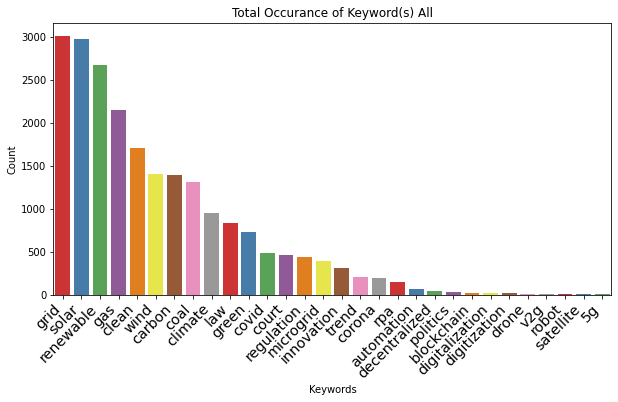

In [23]:
keyword_plot(sort_keyword_frame(total.drop(columns={'Title'})))

In [24]:
count = count.merge(data[['Title','Date','Topic']], on='Title', how='left')

# Analysing the largest category/topic: 'Distributed Energy'

In [25]:
dis_energy = count[count['Topic'] =='distributed-energy']

In [26]:
dis_energy_sum = pd.DataFrame()
for column in dis_energy.columns: 
    try:
        dis_energy_sum.at[0,column] = dis_energy[column].sum()
        dis_energy_sum = dis_energy_sum.reset_index(drop=True)
    except BaseException:
        # Pass to avoid Exception thrown due to the 'Date' column not beeing the right format
        pass

In [27]:
for colum in dis_energy_sum.columns:
    if dis_energy_sum.at[0,colum] == 0:
        dis_energy_sum = dis_energy_sum.drop(columns={colum})
dis_energy_sum=dis_energy_sum.drop(columns={'FullTextLemma','Title','Topic'})

<AxesSubplot:title={'center':'Keywords in the category "Distributed Energy"'}, xlabel='Keywords', ylabel='Count'>

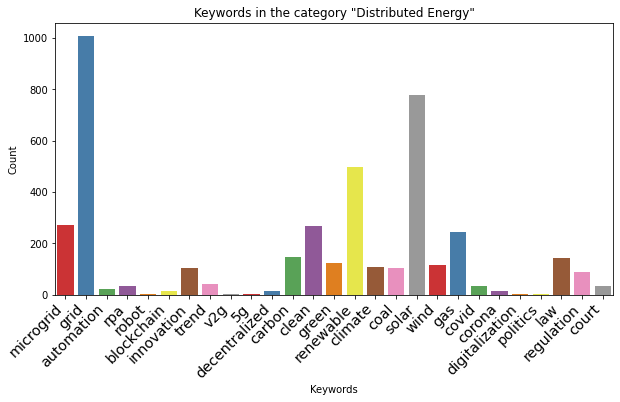

In [28]:
keyword_plot(dis_energy_sum,'Keywords in the category "Distributed Energy"')

#  Current Data
### Check only current occurances

In [34]:
# Take only dates that are max 3 months back from current date
new = count[count['Date'] >= (datetime.now() - relativedelta(months=+6))]

In [35]:
new.shape

(271, 42)

-> Half of the articles are from the last 6 months and approx 1/4 are from the last six months.

In [38]:
total_new = pd.DataFrame()
for column in new.columns: 
    try:
        total_new.at[0,column] = new[column].sum()
    except BaseException:
        # Pass to avoid Exception thrown due to the 'Date' column not beeing the right format
        pass

In [39]:
total_new

FullTextLemma  \
0  ['increasing', 'digitization', 'power', 'secto...   

                                               Title  microgrid   grid  p2p  \
0  propelling the transition digitization bolster...      149.0  607.0  0.0   

   matchmaking  automation   rpa  robot  blockchain  ...  covid  covid-19  \
0          0.0        10.0  46.0    2.0         0.0  ...  178.0       0.0   

   corona  digitalization  digitization  politics    law  regulation  court  \
0    33.0             2.0           9.0       4.0  182.0       112.0  128.0   

                                               Topic  
0  transmission-distributiontransmission-distribu...  

[1 rows x 41 columns]

In [42]:
for colum in total_new.columns:
    if total_new.at[0,colum] == 0:
        total_new = total_new.drop(columns={colum})
total_new=total_new.drop(columns={'FullTextLemma','Title','Topic'})

<AxesSubplot:title={'center':'Keywords "Last 6 Months"'}, xlabel='Keywords', ylabel='Count'>

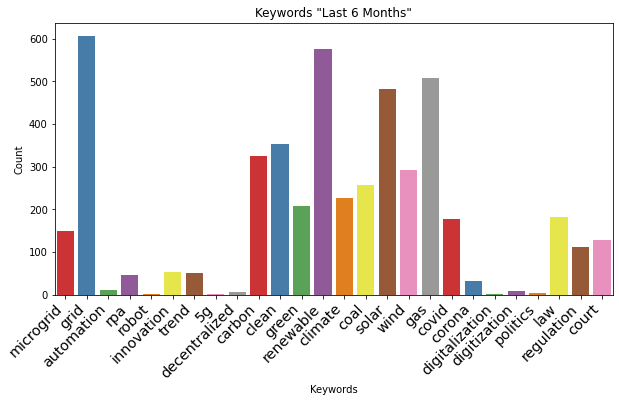

In [44]:
keyword_plot(total_new, 'Keywords "Last 6 Months"')

# Analysing the keyword with the most occurances: 'Grid'

In [45]:
grid_df = count[count['grid']>0]

In [46]:
for column in grid_df.columns: 
    try:
        if column not in ['Topic','Title','FullTextLemma']:
            grid_df.at[0,column] = grid_df[column].sum()
    except BaseException:
        # Pass to avoid Exception thrown due to the 'Date' column not beeing the right format
        pass

In [47]:
# Remove 0 Keywords
for colum in grid_df.columns:
    if grid_df.at[0,colum] == 0:
        grid_df = grid_df.drop(columns={colum})

In [48]:
# Sum up other keywords

In [49]:
grid_new = pd.DataFrame()
for column in grid_df.columns: 
    try:
        grid_new.at[0,column] = grid_df[column].sum()
    except BaseException:
        # Pass to avoid Exception thrown due to the 'Date' column not beeing the right format
        pass

In [50]:
grid_new

FullTextLemma  \
0  ['increasing', 'digitization', 'power', 'secto...   

                                               Title  microgrid    grid  \
0  propelling the transition digitization bolster...      794.0  5999.0   

   automation    rpa  robot  blockchain  innovation  trend  ...     gas  \
0       110.0  152.0   10.0        36.0       408.0  234.0  ...  2618.0   

   covid  corona  digitalization  digitization  politics    law  regulation  \
0  316.0   164.0            44.0          27.0      20.0  678.0       472.0   

   court                                              Topic  
0  244.0  transmission-distributiontransmission-distribu...  

[1 rows x 33 columns]

In [51]:
#TODO: Graph Plot the Connections? of One Keyword with other keywords 

<AxesSubplot:title={'center':'Keywords occuring together with "Grid"'}, xlabel='Keywords', ylabel='Count'>

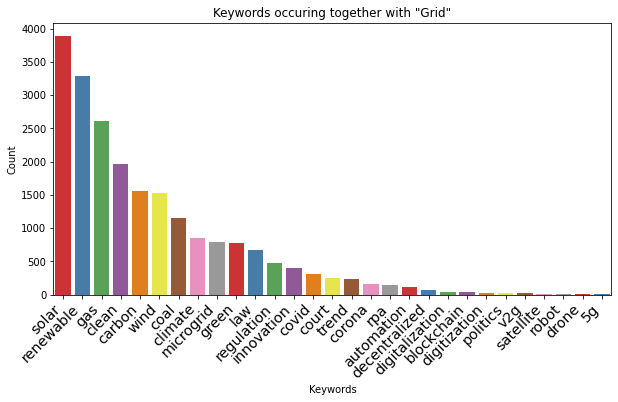

In [52]:
keyword_plot(sort_keyword_frame(grid_new.drop(columns={'FullTextLemma','Title','Topic','grid'})),'Keywords occuring together with "Grid"')

### What are correlated Keywords?

### In which categories/topics does the keyword 'grid' appear?

In [53]:
topics_df = grid_df.groupby('Topic').count()
topics_df = topics_df.drop(topics_df.columns[1:topics_df.shape[1]],axis=1)
topics_df = topics_df.rename(columns={"FullTextLemma":"Count"})

In [54]:
topics_df

Count
Topic                           
demand-response               54
distributed-energy           150
generation                    69
market-news                   28
policy                        16
solar                         34
storage                      123
technology                   105
transmission-distribution     96

<AxesSubplot:title={'center':'Occurance of Keyword "Grid" in Categories'}, xlabel='Keywords', ylabel='Count'>

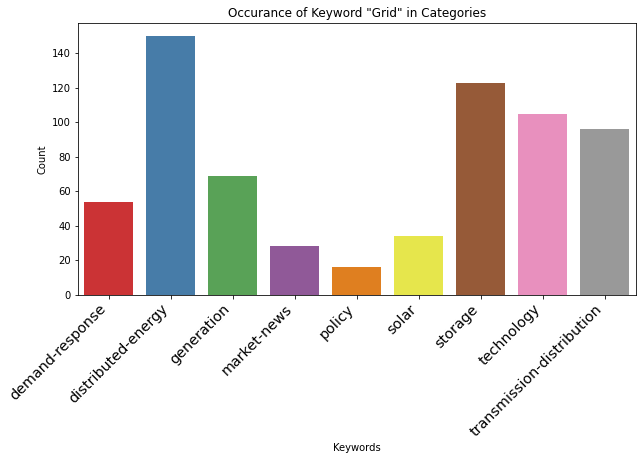

In [55]:
keyword_plot(topics_df.T, 'Occurance of Keyword "Grid" in Categories')